In [1]:
%load_ext tikzmagic

---
slug: "/blog/classificationandregressionwithneuralnetworks"
date: "2021-04-06"
title: "Classification and Regression with Neural Networks"
category: "2 Deep Learning"
order: 1
---

### Introduction

Neural networks are models that approximate functions using an architecture that is based loosely on the architecture of human neurons.
Neural networks are composed of a network of units organized into layers, called hidden units.
The term "Deep Learning" refers to neural network architectures composed of many hidden layers, making the network "deep".

In this post, single hidden layer neural networks will be discussed - one for binary classification, one for multiclass classification, and one for regression output.
I will be briefly reviewing logistic regression, softmax regression, and linear regression here in order to introduce neural networks, but it may help to take a look at my earlier posts on logistic regression, softmax regression, and linear regression before proceeding.
This post will also only contain information on dense feed-forward layers, which are layers in which units are fully-connected, and data only flows in one direction during prediction. 
Information on more complex architectures, like convolutional or recurrent neural networks will not be covered here.

### Binary classification with a neural network

To begin understanding how binary classification with feed-forward neural networks, lets first take a look at how logistic regression works.
To review, logistic regression is a parametric binary classification method that takes real-valued inputs and returns a binary class output estimate.
The computation graph below shows how logistic regression computes output.
A dot product $z$ is calculated between input vector $\vec{x}$ and weight vector $\vec{w}$, and the sigmoid function is taken of $z$.
In the context of neural networks, the sigmoid function would be referred to as the activation function in the output layer. 

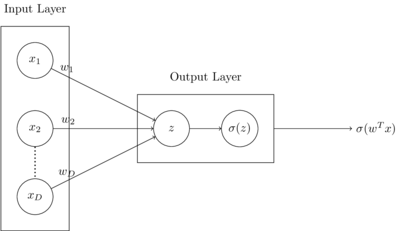

In [35]:
%%tikz s=800,432 -sc=2
\node[draw, circle, minimum width=3em] (x1) at (0, 2) {$x_1$};
\node[draw, circle, minimum width=3em] (x2) at (0, 1) {$x_2$};
\node[draw, circle, minimum width=3em] (xd) at (0, 0) {$x_D$};
\node[draw, circle, minimum width=3em] (z) at (2, 1) {$z$};
\node[draw, circle, minimum width=3em] (sz) at (3, 1) {$\sigma(z)$};
\node (il) at (0, 2.75) {Input Layer};
\node (ol) at (2.5, 1.75) {Output Layer};
\node (f) at (5, 1) {$\sigma(w^T x)$};
\draw (-0.5, 2.5) rectangle (0.5, -0.5);
\draw (1.5, 1.5) rectangle (3.5, 0.5);
\draw[dotted, line width=1pt] (x2) -- (xd);
\draw[->] (x1) edge node[pos=0.15, above] {$w_1$} (z);
\draw[->] (x2) edge node[pos=0.15, above] {$w_2$} (z);
\draw[->] (xd) edge node[pos=0.15, above] {$w_D$} (z);
\draw[->] (z) -- (sz);
\draw[->] (3.5, 1) -- (f);

Parameters $\vec{w}$ are learned through the use of gradient descent, which minimizes a loss function by iteratively moving in the direction of steepest descent. 
In this case, the loss function being used is binary cross-entropy loss, $L(y, \hat{y}) = -[y \log(\hat{y}) + (1-y)\log(1-\hat{y})]$.
The loss is minimized by updating the weights iteratively, by adding the negative partial derivative of the loss with respect to the weights to the weight vector at each step.

Instead of directly calculating $\frac{\partial L}{\partial w_i}$ at each iteration, which is $x_i (\sigma(z)-y)$ (this is derived in my earlier post on logistic regression), making use of the computation graph shown below, partial derivatives are calculated locally, and sent backward across forward connections.
This process of sending local gradients backward across layers to calculate weight updates is known as backpropagation.
In the graph below, the local gradients used in backpropagation are shown in red.

As an example, in a single iteration, $w_1$ is updated using gradient descent as follows:
$$
\begin{aligned}
    w_1 &= w_1 - \alpha \frac{\partial L}{\partial w_1}\\
\end{aligned}
$$
Following the backpropagation arrows from loss $L$ to $w_1$, the partial derivative of the loss $L$ with respect to $w_1$, $\frac{\partial L}{\partial w_1}$ can be calculated as follows:
$$
\begin{aligned}
    \frac{\partial L}{\partial w_1} &= 
    \frac{\partial z}{\partial w_1} 
    \frac{\partial \sigma(z)}{\partial z}
    \frac{\partial L}{\partial \sigma(z)} \\
\end{aligned}
$$

The advantage to using the local gradients to calculate the loss with respect to the weights is that an arbitrary number of layers can be added in between the input and output layers, without having to change the general approach to updating weights at each layer.

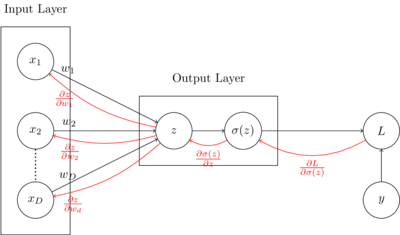

In [21]:
%%tikz s=800,470  -sc=2
\node[draw, circle, minimum width=3em] (x1) at (0, 2) {$x_1$};
\node[draw, circle, minimum width=3em] (x2) at (0, 1) {$x_2$};
\node[draw, circle, minimum width=3em] (xd) at (0, 0) {$x_D$};
\node[draw, circle, minimum width=3em] (z) at (2, 1) {$z$};
\node[draw, circle, minimum width=3em] (sz) at (3, 1) {$\sigma(z)$};
\node[draw, circle, minimum width=3em] (l) at (5, 1) {$L$};
\node[draw, circle, minimum width=3em] (y) at (5, 0) {$y$};
\node (il) at (0, 2.75) {Input Layer};
\node (ol) at (2.5, 1.75) {Output Layer};
\draw (-0.5, 2.5) rectangle (0.5, -0.5);
\draw (1.5, 1.5) rectangle (3.5, 0.5);
\draw[dotted, line width=1pt] (x2) -- (xd);
\draw[->] (x1) edge node[pos=0.15, above] {$w_1$} (z);
\draw[->] (x2) edge node[pos=0.15, above] {$w_2$} (z);
\draw[->] (xd) edge node[pos=0.15, above] {$w_D$} (z);
\draw[->] (z) -- (sz);
\draw[->] (sz) -- (l);
\draw[->] (y) -- (l);
\draw[->, color=red] (l) edge[bend left] node[midway, below] {$\frac{\partial L}{\partial \sigma(z)}$} (sz);
\draw[->, color=red] (sz) edge[bend left] node[midway, below] {$\frac{\partial \sigma(z)}{\partial z}$} (z);
\draw[->, color=red] (z) edge[bend left=15] node[pos=.85, below] {$\frac{\partial z}{\partial w_1}$} (x1);
\draw[->, color=red] (z) edge[bend left=15] node[pos=.85, below] {$\frac{\partial z}{\partial w_2}$} (x2);
\draw[->, color=red] (z) edge[bend left=15] node[pos=.85, below] {$\frac{\partial z}{\partial w_d}$} (xd);

The computation graph below displays a binary classification model similar to the one above, but with the addition of a hidden layer containing $E$ units. 
In this graph, units labelled with $a$ and a corresponding subscript represent activation functions.
In the final layer, similar to the computation graph above, the activation function will be the sigmoid function.
In hidden layers, the activation function could be one of many options. 
Some example activation functions are the ReLU, sigmoid, softmax, and tanh functions.

Each layer other than the input layer has its own set of weights.
The red backpropagation path shows the partial derivatives needed for the first set of weights, and the blue backpropagation path shows the partial derivatives needed for the second set of weights.
In order to maintain clarity in the diagram, all backpropogation paths are not exhaustively displayed.

As an example, in this model, updating $w_1$, from the second set of weights can be performed by following the blue path as shown:
$$
\begin{aligned}
    w_1 &= w_1 - \alpha \frac{\partial L}{\partial w_1}\\
    \frac{\partial L}{\partial w_1} &=  
    \frac{\partial z_{2, 1}}{\partial w_1} 
    \frac{\partial a_{2, 1}}{\partial z_{2, 1}}
    \frac{\partial L}{\partial a_{2, 1}} \\
\end{aligned}
$$
Updating $w_{1, 1}$ from the first set of weights can be performed by following the red path in the computation graph as shown:
$$
\begin{aligned}
    w_{1, 1} &= w_{1, 1} - \alpha \frac{\partial L}{\partial w_{1, 1}}\\
    \frac{\partial L}{\partial w_{1, 1}} &= 
    \frac{\partial z_{1, 1}}{\partial w_{1, 1}} 
    \frac{\partial a_{1, 1}}{\partial z_{1, 1}} 
    \frac{\partial z_{2, 1}}{\partial a_{1, 1}} 
    \frac{\partial a_{2, 1}}{\partial z_{2, 1}} 
    \frac{\partial L       }{\partial a_{2, 1}} \\ 
\end{aligned}
$$

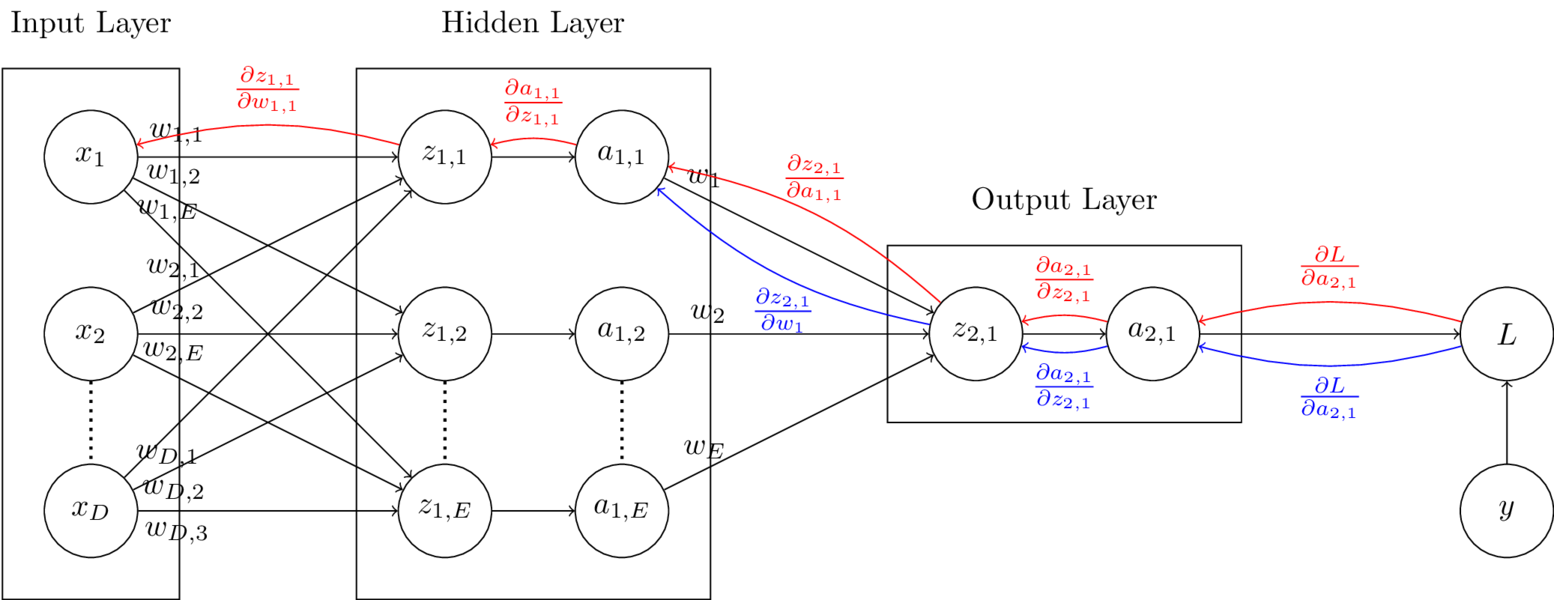

In [23]:
%%tikz -s=1554,600 -sc=2
\node[draw, circle, minimum width=3em] (x1) at (0, 2) {$x_1$};
\node[draw, circle, minimum width=3em] (x2) at (0, 1) {$x_2$};
\node[draw, circle, minimum width=3em] (xd) at (0, 0) {$x_D$};
\node[draw, circle, minimum width=3em] (z11) at (2, 2) {$z_{1, 1}$};
\node[draw, circle, minimum width=3em] (z12) at (2, 1) {$z_{1, 2}$};
\node[draw, circle, minimum width=3em] (z1e) at (2, 0) {$z_{1, E}$};
\node[draw, circle, minimum width=3em] (a11) at (3, 2) {$a_{1, 1}$};
\node[draw, circle, minimum width=3em] (a12) at (3, 1) {$a_{1, 2}$};
\node[draw, circle, minimum width=3em] (a1e) at (3, 0) {$a_{1, E}$};
\node[draw, circle, minimum width=3em] (z21) at (5, 1) {$z_{2, 1}$};
\node[draw, circle, minimum width=3em] (a21) at (6, 1) {$a_{2, 1}$};
\node[draw, circle, minimum width=3em] (l) at (8, 1) {$L$};
\node[draw, circle, minimum width=3em] (y) at (8, 0) {$y$};
\node (il) at (0, 2.75) {Input Layer};
\node (hl) at (2.5, 2.75) {Hidden Layer};
\node (ol) at (5.5, 1.75) {Output Layer};
\draw(-.5, 2.5) rectangle (.5, -.5);
\draw (1.5, 2.5) rectangle (3.5, -0.5);
\draw (4.5, 1.5) rectangle (6.5, 0.5);
\draw[dotted, line width=1pt] (x2) -- (xd);
\draw[dotted, line width=1pt] (z12) -- (z1e);
\draw[dotted, line width=1pt] (a12) -- (a1e);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1, 1}$} (z11);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1, 2}$} (z12);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1, E}$} (z1e);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2, 1}$} (z11);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2, 2}$} (z12);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2, E}$} (z1e);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D, 1}$} (z11);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D, 2}$} (z12);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D, 3}$} (z1e);
\draw[->] (z11) -- (a11);
\draw[->] (z12) -- (a12);
\draw[->] (z1e) -- (a1e);
\draw[->] (a11) edge node[pos=0.15, above] {$w_{1}$} (z21);
\draw[->] (a12) edge node[pos=0.15, above] {$w_{2}$} (z21);
\draw[->] (a1e) edge node[pos=0.15, above] {$w_{E}$} (z21);
\draw[->] (z21) -- (a21);
\draw[->] (a21) -- (l);
\draw[->] (y) -- (l);
\draw[->, color=red] (l) edge[bend right=15] node[midway, above] {$\frac{\partial L}{\partial a_{2,1}}$} (a21);
\draw[->, color=red] (a21) edge[bend right=15] node[midway, above] {$\frac{\partial a_{2, 1}}{\partial z_{2,1}}$} (z21);
\draw[->, color=red] (z21) edge[bend right=15] node[midway, above] {$\frac{\partial z_{2, 1}}{\partial a_{1,1}}$} (a11);
\draw[->, color=red] (a11) edge[bend right=15] node[midway, above] {$\frac{\partial a_{1, 1}}{\partial z_{1,1}}$} (z11);
\draw[->, color=red] (z11) edge[bend right=15] node[midway, above] {$\frac{\partial z_{1, 1}}{\partial w_{1,1}}$} (x1);
\draw[->, color=blue] (l) edge[bend left=15] node[midway, below] {$\frac{\partial L}{\partial a_{2,1}}$} (a21);
\draw[->, color=blue] (a21) edge[bend left=15] node[midway, below] {$\frac{\partial a_{2, 1}}{\partial z_{2,1}}$} (z21);
\draw[->, color=blue] (z21) edge[bend left=15] node[midway, below] {$\frac{\partial z_{2,1}}{\partial w_1}$} (a11);

### Code

The code for a feed-forward neural network layer is shown below.
The provided `DefaultDenseLayer` class can be used to construct either of the two neural networks shown in the prior two computation graphs.
A wrapper class for easier use of multiple layers together will be provided later in this post.

In [24]:
from abc import ABC, abstractmethod
import torch


def Relu(x: torch.Tensor) -> (torch.Tensor, torch.Tensor):
    """ Relu activation function

    Args:
        x: input tensor

    Returns:
        activated output tensor
        local gradient 
    """

    output, grad = torch.clone(x), torch.clone(x)                
    output[output < 0] = 0 
    grad[grad > 0] = 1
    grad[grad < 0] = 0 
    return output, grad


def Sigmoid(x: torch.Tensor) -> (torch.Tensor, torch.Tensor): 
    """ Sigmoid activation function

    Args:
        x: input tensor

    Returns:
        activated output tensor
        local gradient 
    """

    output = (1 / (1 + torch.exp(-x)))
    grad = ((1 - output) * (output))
    return output, grad


def Softmax(x: torch.Tensor) -> (torch.tensor, torch.Tensor):
    """ Softmax activation function

    Args:
        x: input tensor

    Returns:
        activated output tensor
        local gradient 
    """

    output = torch.exp(x) / torch.sum(torch.exp(x), dim=1)[:, None]
    diags = torch.stack([torch.diag(output[i]) for i in range(output.shape[0])])
    grad = diags - torch.einsum('ij,ik->ijk', output, output)
    return output, grad


# Applicable activation functions
ACTIVATIONS = {
    'relu'   : Relu,
    'sigmoid': Sigmoid,
    'softmax': Softmax
}


class Layer(ABC):
    """ Abstract base class for neural network layers
    """

    @abstractmethod
    def __init__(self):
        """ Initialize layer
        """
        pass
    

    @abstractmethod
    def forward(self):
        """ Run forward pass
        """
        pass


    @abstractmethod
    def backward(self):
        """ Run backward propagation
        """
        pass


def Dense(inputdim: int, units: int, activation: str) -> Layer:
    """ Returns appropriate initialized layer architecture provided activation

    Args:
        inputdim: number of input units
        units: number of units in layer
        activation: activation function string => should be a key of ACTIVATIONS

    Returns:
        Initialized neural network layer
    """

    if activation == 'softmax':                
        return SoftmaxDenseLayer(inputdim=inputdim, units=units, activation='softmax')

    else: 
        return DefaultDenseLayer(inputdim=inputdim, units=units, activation=activation)            


class DefaultDenseLayer(Layer): 
    """ Default dense layer class
    """


    def __init__(self, inputdim: int, units: int, activation: str) -> None:
        """ Initialize default dense layer

        Args:
            inputdim: number of input units
            units: number of units in layer
            activation: activation function string => should be a key of ACTIVATIONS
        """

        self.w = (torch.rand((inputdim, units)) * 2 - 1)
        self.activation = activation
        self.dz_dw = None
        self.dz_dx = None
        self.da_dz = None


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """ Run forward pass through layer, saving local gradients

        Args:
            x: input data

        Returns:
            output of layer given input x
        """

        z, self.dz_dw, self.dz_dx = torch.einsum('ij,jk->ik', x, self.w), x, self.w
        a, self.da_dz = ACTIVATIONS[self.activation](z)
        return a


    def backward(self, dl: torch.Tensor, alpha: float) -> torch.Tensor:
        """ Run backward pass through layer, updating weights and returning
            cumulative gradient from last connected layer (output layer)
            backwards through to this layer

        Args:
            dl: cumulative gradient calculated from layers ahead of this layer

        Returns:
            cumulative gradient calculated at this layer
        """

        dl_dz = self.da_dz * dl
        dl_dw = torch.einsum('ij,ik->jk', self.dz_dw, dl_dz) / dl.shape[0] 
        dl_dx = torch.einsum('ij,kj->ki', self.dz_dx, dl_dz)
        self.w -= alpha * dl_dw
        return dl_dx



### Multinomial classification with a neural network

In order to perform multinomial classification, the softmax function can be used in the output layer with as many units as possible classes.
The computation graph below display a multinomial logistic regression model. 
In this case, the softmax function is used as an activation function rather than the logistic function.
Compared to the logistic regression computation graph, there are more backpropagating paths from the loss to the weights.
This is due to the fact that the softmax functions operates on vectors rather than single units, so each member of the vector $\vec{z}$ influences every output of the vector $\vec{s(z)}$.

As an example, in this model, updating weight $w_{1, 1}$ requires looking at 3 different paths (shown in red on the computation graph).
Local derivatives are multiplied across backpropagation graphs, and added together where paths meet.
The update is calculated as follows:
$$
\begin{aligned}
    w_{1, 1} &= w_{1, 1} - \alpha \frac{\partial L}{\partial w_{1, 1}} \\
    \frac{\partial L}{\partial w_{1, 1}} &= 
    \frac{\partial z_1}{\partial w_{1, 1}}\frac{\partial s(z_1)}{\partial z_1}\frac{\partial L}{\partial s(z_1)} + 
    \frac{\partial z_1}{\partial w_{1, 1}}\frac{\partial s(z_2)}{\partial z_1}\frac{\partial L}{\partial s(z_2)} +
    \frac{\partial z_1}{\partial w_{1, 1}}\frac{\partial s(z_K)}{\partial z_1}\frac{\partial L}{\partial s(z_K)}\\
    &=
    \frac{\partial z_1}{\partial w_{1, 1}} \left[ 
    \frac{\partial s(z_1)}{\partial z_1}\frac{\partial L}{\partial s(z_1)} + 
    \frac{\partial s(z_2)}{\partial z_1}\frac{\partial L}{\partial s(z_2)} +
    \frac{\partial s(z_K)}{\partial z_1}\frac{\partial L}{\partial s(z_K)} 
    \right]
    \\
\end{aligned}
$$

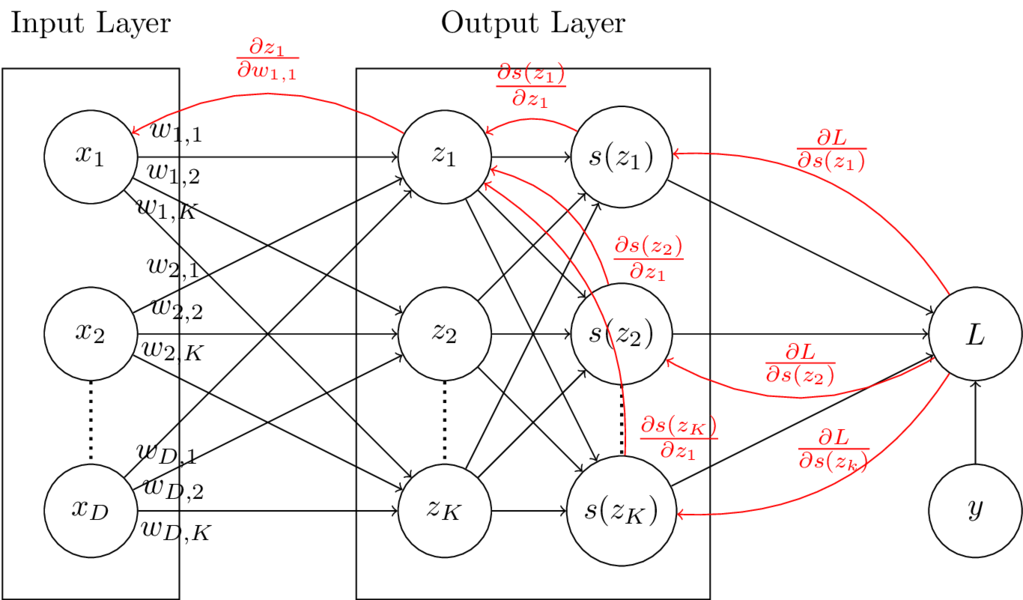

In [26]:
%%tikz -s=1024,600 -sc=2
\node[draw, circle, minimum width=3em] (x1) at (0, 2) {$x_1$};
\node[draw, circle, minimum width=3em] (x2) at (0, 1) {$x_2$};
\node[draw, circle, minimum width=3em] (xd) at (0, 0) {$x_D$};
\node[draw, circle, minimum width=3em] (z1) at (2, 2) {$z_1$};
\node[draw, circle, minimum width=3em] (z2) at (2, 1) {$z_2$};
\node[draw, circle, minimum width=3em] (zk) at (2, 0) {$z_K$};
\node[draw, circle, minimum width=3em] (sz1) at (3, 2) {$s(z_1)$};
\node[draw, circle, minimum width=3em] (sz2) at (3, 1) {$s(z_2)$};
\node[draw, circle, minimum width=3em] (szk) at (3, 0) {$s(z_K)$};
\node[draw, circle, minimum width=3em] (l) at (5, 1) {$L$};
\node[draw, circle, minimum width=3em] (y) at (5, 0) {$y$};
\node (il) at (0, 2.75) {Input Layer};
\node (ol) at (2.5, 2.75) {Output Layer};
\draw (-0.5, 2.5) rectangle (0.5, -0.5);
\draw (1.5, 2.5) rectangle (3.5, -0.5);
\draw[dotted, line width=1pt] (x2) -- (xd);
\draw[dotted, line width=1pt] (z2) -- (zk);
\draw[dotted, line width=1pt] (sz2) -- (szk);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,1}$} (z1);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,2}$} (z2);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,K}$} (zk);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,1}$} (z1);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,2}$} (z2);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,K}$} (zk);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,1}$} (z1);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,2}$} (z2);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,K}$} (zk);
\draw[->] (z1) -- (sz1);
\draw[->] (z1) -- (sz2);
\draw[->] (z1) -- (szk);
\draw[->] (z2) -- (sz1);
\draw[->] (z2) -- (sz2);
\draw[->] (z2) -- (szk);
\draw[->] (zk) -- (sz1);
\draw[->] (zk) -- (sz2);
\draw[->] (zk) -- (szk);
\draw[->] (sz1) -- (l);
\draw[->] (sz2) -- (l);
\draw[->] (szk) -- (l);
\draw[->] (y) -- (l);
\draw[->, color=red] (l) edge[bend right] node[midway, above] {$\frac{\partial L}{\partial s(z_1)}$} (sz1);
\draw[->, color=red] (l) edge[bend left] node[midway, above] {$\frac{\partial L}{\partial s(z_2)}$} (sz2);
\draw[->, color=red] (l) edge[bend left] node[midway, above] {$\frac{\partial L}{\partial s(z_k)}$} (szk);
\draw[->, color=red] (sz1) edge[bend right] node[midway, above] {$\frac{\partial s(z_1)}{\partial z_1}$} (z1);
\draw[->, color=red] (sz2) edge[bend right] node[pos=0.15, right] {$\frac{\partial s(z_2)}{\partial z_1}$} (z1);
\draw[->, color=red] (szk) edge[bend right] node[pos=0.05, right] {$\frac{\partial s(z_K)}{\partial z_1}$} (z1);
\draw[->, color=red] (z1) edge[bend right] node[midway, above] {$\frac{\partial z_1}{\partial w_{1, 1}}$} (x1);

The computation graph below displays a multinomial classification model similar to the one above, but with the addition of a hidden layer containing $E$ units. 
In this graph, units labelled with $a$ and a corresponding subscript represent activation functions.
In the final layer, similar to the computation graph above, the activation function will be the softmax function.
In hidden layers, the activation function could be one of many options.
However, because the $z_{1..E}$ nodes in the hidden layer are not fully connected to the $a_{1..E}$ nodes in the hidden layer, we know the activation function is not softmax in this case.
Some example activation functions are the ReLU, sigmoid, softmax, and tanh functions.
Backpropagation paths are not shown in this graph, but should not be to difficult to figure out as an exercise based on the prior computation graphs discussed in this post.

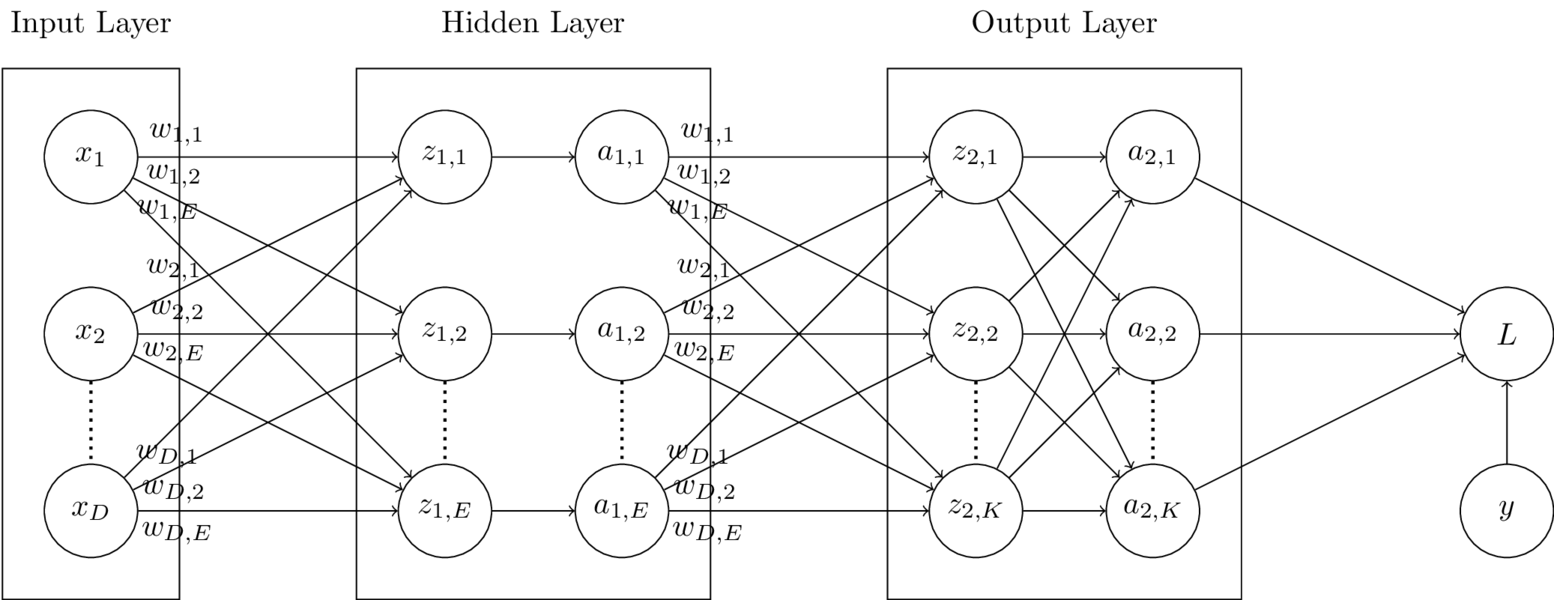

In [29]:
%%tikz -s=1554,600 -sc=2
\node[draw, circle, minimum width=3em] (x1) at (0, 2) {$x_1$};
\node[draw, circle, minimum width=3em] (x2) at (0, 1) {$x_2$};
\node[draw, circle, minimum width=3em] (xd) at (0, 0) {$x_D$};
\node[draw, circle, minimum width=3em] (z11) at (2, 2) {$z_{1, 1}$};
\node[draw, circle, minimum width=3em] (z12) at (2, 1) {$z_{1, 2}$};
\node[draw, circle, minimum width=3em] (z1e) at (2, 0) {$z_{1, E}$};
\node[draw, circle, minimum width=3em] (a11) at (3, 2) {$a_{1, 1}$};
\node[draw, circle, minimum width=3em] (a12) at (3, 1) {$a_{1, 2}$};
\node[draw, circle, minimum width=3em] (a1e) at (3, 0) {$a_{1, E}$};
\node[draw, circle, minimum width=3em] (z21) at (5, 2) {$z_{2, 1}$};
\node[draw, circle, minimum width=3em] (z22) at (5, 1) {$z_{2, 2}$};
\node[draw, circle, minimum width=3em] (z2k) at (5, 0) {$z_{2, K}$};
\node[draw, circle, minimum width=3em] (a21) at (6, 2) {$a_{2, 1}$};
\node[draw, circle, minimum width=3em] (a22) at (6, 1) {$a_{2, 2}$};
\node[draw, circle, minimum width=3em] (a2k) at (6, 0) {$a_{2, K}$};
\node[draw, circle, minimum width=3em] (l) at (8, 1) {$L$};
\node[draw, circle, minimum width=3em] (y) at (8, 0) {$y$};
\node (il) at (0, 2.75) {Input Layer};
\node (hl) at (2.5, 2.75) {Hidden Layer};
\node (ol) at (5.5, 2.75) {Output Layer};
\draw (-0.5, 2.5) rectangle (0.5, -0.5);
\draw(1.5, 2.5) rectangle (3.5, -0.5);
\draw(4.5, 2.5) rectangle (6.5, -0.5);
\draw[dotted, line width=1pt] (x2) -- (xd);
\draw[dotted, line width=1pt] (z12) -- (z1e);
\draw[dotted, line width=1pt] (a12) -- (a1e);
\draw[dotted, line width=1pt] (z22) -- (z2k);
\draw[dotted, line width=1pt] (a22) -- (a2k);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,1}$} (z11);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,2}$} (z12);
\draw[->] (x1) edge node[pos=0.15, above] {$w_{1,E}$} (z1e);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,1}$} (z11);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,2}$} (z12);
\draw[->] (x2) edge node[pos=0.15, above] {$w_{2,E}$} (z1e);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,1}$} (z11);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,2}$} (z12);
\draw[->] (xd) edge node[pos=0.15, below] {$w_{D,E}$} (z1e);
\draw[->] (z11) -- (a11);
\draw[->] (z12) -- (a12);
\draw[->] (z1e) -- (a1e);
\draw[->] (a11) edge node[pos=0.15, above] {$w_{1,1}$} (z21);
\draw[->] (a11) edge node[pos=0.15, above] {$w_{1,2}$} (z22);
\draw[->] (a11) edge node[pos=0.15, above] {$w_{1,E}$} (z2k);
\draw[->] (a12) edge node[pos=0.15, above] {$w_{2,1}$} (z21);
\draw[->] (a12) edge node[pos=0.15, above] {$w_{2,2}$} (z22);
\draw[->] (a12) edge node[pos=0.15, above] {$w_{2,E}$} (z2k);
\draw[->] (a1e) edge node[pos=0.15, below] {$w_{D,1}$} (z21);
\draw[->] (a1e) edge node[pos=0.15, below] {$w_{D,2}$} (z22);
\draw[->] (a1e) edge node[pos=0.15, below] {$w_{D,E}$} (z2k);
\draw[->] (z21) -- (a21);
\draw[->] (z21) -- (a22);
\draw[->] (z21) -- (a2k);
\draw[->] (z22) -- (a21);
\draw[->] (z22) -- (a22);
\draw[->] (z22) -- (a2k);
\draw[->] (z2k) -- (a21);
\draw[->] (z2k) -- (a22);
\draw[->] (z2k) -- (a2k);
\draw[->] (a21) -- (l);
\draw[->] (a22) -- (l);
\draw[->] (a2k) -- (l);
\draw[->] (y) -- (l);

### Code

The code for a feed-forward softmax neural network layer is shown below.
The `forward` and `__init__` functions of the `SoftmaxDenseLayer` class are inherited from the `DefaultDenseLayer` class. 
Togther, the `SoftmaxDenseLayer` and `DefaultDenseLayer` classes can be used together to create any of the computation graphs described in this post so far.

In [30]:
class SoftmaxDenseLayer(DefaultDenseLayer):
    """ Dense layer class for multinomial classification using the Softmax
        activation function
    """


    def backward(self, dl: torch.Tensor, alpha: float) -> torch.Tensor:
        """ Run backward pass through layer, updating weights and returning
            cumulative gradient from last connected layer (output layer)
            backwards through to this layer

        Args:
            dl: cumulative gradient calculated from layers ahead of this layer

        Returns:
            cumulative gradient calculated at this layer
        """

        dl_dz = torch.einsum('ijk,ik->ij', self.da_dz, dl)
        dl_dw = torch.einsum('ij,ik->jk', self.dz_dw, dl_dz) / dl.shape[0] 
        dl_dx = torch.einsum('ij,kj->ki', self.dz_dx, dl_dz)
        self.w -= alpha * dl_dw

        return dl_dx

### Regression with a neural network

Regression problems can be approached with neural networks by simply creating an output layer with a single hidden unit and no activation function.
Without an activation function on the dot product produced in the output layer, the resulting output of the network will be a continuous quantity output.
The `DefaultDenseLayer` displayed earlier in this post can be used to learn regression models when the identity function is used as an activation.

### Combining layers: neural network model code

The code for a wrapper model that can be used to combine multiple `Layer` objects into a single model is displayed below.

In [31]:
from abc import ABC, abstractmethod
from typing import List

from mlr.NN.Loss import *
from tqdm import trange
import torch


def ErrorRate(y: torch.Tensor, yhat: torch.Tensor) -> torch.Tensor:
    """ Calculate error rate given true and predicted values

    Args:
        y: true values
        yhat: predicted values

    Returns:
        error rate
    """

    if len(y.shape) > 1 and y.shape[1] > 1: err = OneHotErrorRate(y, yhat)
    else: err = torch.sum((y != yhat).float()) / y.shape[0]
    return err


def OneHotErrorRate(y: torch.Tensor, yhat: torch.Tensor) -> torch.Tensor:
    """ Calculate error rate given true and predicted values for one-hot encoded
        vectors

    Args:
        y: true values
        yhat: predicted values

    Returns:
        error rate
    """
    
    return ErrorRate(torch.argmax(y, dim=1), torch.argmax(yhat, dim=1))


def Accuracy(y: torch.Tensor, yhat: torch.Tensor) -> torch.Tensor:
    """ Calculate accuracy given true and predicted values

    Args:
        y: true values
        yhat: predicted values

    Returns:
        accuracy 
    """

    return 1 - ErrorRate(y, yhat)


def BinaryCrossEntropy(y: torch.Tensor, yhat: torch.tensor) -> (torch.Tensor, torch.Tensor):
    """ Calculate binary cross entropy given true values and predictions, and
        returns loss as well as local gradient

    Args:
        y: true values
        yhat: predicted values

    Returns:
        binary cross entorpy loss
        local gradient
    """
    
    output = torch.mean(- ((y * torch.log(yhat)) + ((1-y) * torch.log(1-yhat))))
    grad = ((1 - y) / (1 - yhat)) - (y / yhat)
    return output, grad


def CategoricalCrossEntropy(y: torch.Tensor, yhat: torch.Tensor):
    """ Calculate categorical cross entropy given true values and predictions,
        and returns loss as well as local gradient

    Args:
        y: true values
        yhat: predicted values

    Returns:
        categorical cross entorpy loss
        local gradient
    """

    loss = torch.mean(-1 * torch.sum(y * torch.log(yhat), dim=1))
    grad = -1 * (y / yhat)
    return loss, grad            


def MeanSquaredError(y: torch.Tensor, yhat: torch.Tensor):
    """ Calculate mean squared error given true values and predictions, and
        returns loss as well as local gradient

    Args:
        y: true values
        yhat: predicted values

    Returns:
        mean squared error loss
        local gradient
    """

    loss = torch.mean((y - yhat)**2)
    grad = yhat - y
    return loss, grad


# Applicable loss functions
LOSSES = {
    'binary_cross_entropy':      BinaryCrossEntropy,
    'categorical_cross_entropy': CategoricalCrossEntropy,
    'mean_squared_error':        MeanSquaredError
}


class Network(ABC):
    """ Abstract base class for neural network models 
    """
        
    @abstractmethod
    def __init__(self):
        """ Initialize model
        """
        pass

    
    @abstractmethod
    def forward(self):
        """ Run forward pass through network
        """
        pass


    @abstractmethod
    def backward(self):
        """ Run backpropagation through network
        """
        pass
    

    @abstractmethod
    def fit(self):
        """ Fit network to data
        """
        pass


    @abstractmethod
    def predict(self):
        """ Return predictions given input
        """
        pass


def Model(layers: List[Layer], loss=str) -> Network:
    """ Return initialized neural network model provided loss type

    Args:
        layers: list of initialized neural network Layer objects
        loss: string describing loss type => should be a key of LOSSES

    Returns:
        Initialized neural nework model object
    """

    if loss == 'binary_cross_entropy':
        return BinaryClassifier(layers, loss='binary_cross_entropy')

    elif loss == 'categorical_cross_entropy':
        return DefaultClassifier(layers, loss='categorical_cross_entropy')

    elif loss == 'mean_squared_error':
        return DefaultRegressor(layers, loss='mean_squared_error')


class DefaultClassifier(Network):
    """ Default classifier class (one-hot encoded multinomial output)
    """

    def __init__(self, layers: List[Layer], loss=str) -> None:
        """ Initialize model

        Args:
            layers: list of initialized neural network Layer objects
            loss: string describing loss type => should be a key of LOSSES
        """
        self.layers = layers
        self.loss = loss

    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """ Run forward pass through network

        Args:
            x: input data

        Returns:
            output of final layer in network
        """

        ypred = x
        for layer in self.layers:
            ypred = layer.forward(ypred)                        

        return ypred


    def backward(self, dl: torch.Tensor, alpha) -> None:
        """ Run backpropagation through network

        Args:
            dl: cumlulative gradient at loss function
            alpha: learning rate
        """

        for layer in self.layers[::-1]:
            dl = layer.backward(dl, alpha)

    
    def fit(self, x: torch.Tensor, y: torch.Tensor, batch: int, alpha: float, epochs: int) -> None:
        """ Fit network to data
        
        Args:
            x: input data
            y: input labels
            batch: batch size for training
            alpha: learning rate
            epochs: number of iterations over entire dataset to train
        """

        epochs = trange(epochs)
        for epoch in epochs:

            l, start, end = [], 0, batch
            for b in range((x.shape[0]//2) + 1):

                xbatch, ybatch = x[start:end], y[start:end]
                if xbatch.shape[0] > 0:

                    ypred = self.forward(xbatch)              # Forward pass
                    bl, dl = LOSSES[self.loss](ybatch, ypred) # Calculate loss
                    dl = self.backward(dl, alpha)             # Backpropagation
                    l.append(bl.item())

                start += batch; end += batch

            ypred = self.predict(x)
            acc = Accuracy(y, ypred)
            epochs.set_description('Loss: %.8f | Acc: %.8f' % (sum(l) / len(l), acc))


    def predict(self, x: torch.Tensor) -> torch.Tensor:
        """ Return predictions given input

        Args:
            x: input data

        Returns:
            predictions               
        """
         
        return self.forward(x)


class BinaryClassifier(DefaultClassifier):
    """ Classifier class for binomial output only
    """

    def predict(self, x: torch.Tensor):
        """ Return predictions given input

        Args:
            x: input data

        Returns:
            predictions               
        """

        ypred = self.forward(x)
        if self.loss == 'binary_cross_entropy':
            ypred[ypred >= 0.5] = 1
            ypred[ypred < 0.5] = 0

        return ypred


class DefaultRegressor(DefaultClassifier):
    """ Default regressor class
    """

    def fit(self, x: torch.Tensor, y: torch.Tensor, batch: int, alpha: float, epochs: int):
        """ Fit network to data
        
        Args:
            x: input data
            y: input labels
            batch: batch size for training
            alpha: learning rate
            epochs: number of iterations over entire dataset to train
        """

        epochs = trange(epochs)
        for epoch in epochs:

            l, start, end = [], 0, batch
            for b in range((x.shape[0]//2) + 1):

                xbatch, ybatch = x[start:end], y[start:end]
                if xbatch.shape[0] > 0:

                    ypred = self.forward(xbatch)              # Forward pass
                    bl, dl = LOSSES[self.loss](ybatch, ypred) # Calculate loss
                    dl = self.backward(dl, alpha)             # Backpropagation
                    l.append(bl.item())

                start += batch 
                end += batch

            ypred = self.predict(x)
            mse, _ = MeanSquaredError(y, ypred)
            epochs.set_description('Loss: %.8f' % mse)

Example usage of the above model for a multinomial classification problem is shown below. 
For those with experience with the Keras framework, the syntax may be familiar.

In [ ]:
# Initialize 2 Layer neural network
dnn = Model([
    Dense(inputdim=xtrain.shape[1], units=32, activation='relu'),
    Dense(inputdim=32, units=3, activation='softmax')
], loss='categorical_cross_entropy')

# Train on data
dnn.fit(x=xtrain, y=ytrain, batch=8, alpha=1e-4, epochs=1000)

# Test
ypred = dnn.predict(xtest)
print('Test Accuracy: %.4f' % Accuracy(ytest, ypred))

### Resources

- Burkov, Andriy. *The Hundred Page Machine Learning Book*. 2019.
- Jurafsky, Daniel, and James H. Martin. *Speech and Language Processing: An Introduction to Natural Language Processing, Computational Linguistics, and Speech Recognition*. Pearson, 2020.
- Goodfellow, Ian, et al. *Deep Learning*. MIT Press, 2017. 